In [121]:
# Import necessary libraries
# This cell imports essential libraries for data manipulation (pandas, numpy),
# visualization (matplotlib, seaborn), and sets a default style for plots.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set default styles for plots
sns.set(style="whitegrid")

In [122]:
# Function to load and clean the World Happiness dataset
# This cell defines a function to load the dataset, remove rows with missing
# "Ladder score," and fill missing numeric values with column means.

def load_and_clean_data(filepath):
    """
    Load the World Happiness dataset and perform basic cleaning:
    - Remove rows with missing Ladder score (target variable)
    - Fill missing numeric values with column means
    
    Parameters:
        filepath (str): Path to the CSV file containing the dataset.
    
    Returns:
        pd.DataFrame: Cleaned dataset.
    """
    # Load the dataset
    df = pd.read_csv(filepath)
    
    # Drop rows with missing Ladder score
    df = df.dropna(subset=['Ladder score'])
    
    # Identify numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    # Fill missing numeric values with column means
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
    
    return df

In [123]:
# Function to compute summary statistics for selected variables
# This cell defines a function to calculate mean, standard deviation,
# minimum, and maximum for specified variables in the dataset.

def compute_summary_stats(df, variables):
    """
    Compute mean, standard deviation, minimum, and maximum for the selected variables.
    
    Parameters:
        df (pd.DataFrame): The dataset.
        variables (list): List of variable names to compute statistics for.
    
    Returns:
        pd.DataFrame: Summary statistics for the selected variables.
    """
    summary = pd.DataFrame({
        'Variable': variables,
        'Mean': df[variables].mean(),
        'Std': df[variables].std(),
        'Min': df[variables].min(),
        'Max': df[variables].max()
    })
    
    # Round values for better readability
    summary = summary.round(2)
    return summary

In [124]:
# Function to plot the distribution of Ladder scores by region
# This cell defines a function to create a KDE plot of Ladder scores
# grouped by regions, with a global mean line for reference.

def plot_ladder_score_distribution(df):
    """
    Plot the KDE (Kernel Density Estimate) of Ladder scores by Regional indicator.
    A global mean line is also added for reference.
    
    Parameters:
        df (pd.DataFrame): The dataset.
    """
    plt.figure(figsize=(15, 8))
    sns.kdeplot(x=df['Ladder score'], hue = df['Regional indicator'], fill = True, linewidth = 2)
    plt.axvline(df['Ladder score'].mean(),c= 'black')
    plt.title('Ladder Score Distribution by Regional Indicator')
    plt.show()

In [125]:
# Function to plot boxplots for social factors
# This cell defines a function to create boxplots for variables like
# Social support, Freedom, Generosity, and Perceptions of corruption.

def plot_boxplot_social_factors(df):
    """
    Create boxplots for the distribution of Social support, Freedom to make life choices,
    Generosity, and Perceptions of corruption.
    
    Parameters:
        df (pd.DataFrame): The dataset.
    """
    features = ['Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        data=df[features],
        orient='h',
        palette='Set3'
    )
    plt.title('Distribution of Social Support, Freedom, Generosity, and Perceptions of Corruption', fontsize=16)
    plt.xlabel('Value', fontsize=14)
    plt.yticks(fontsize=12)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

In [126]:
# Function to plot happiest to unhappiest countries
# This cell defines a function to create a bar chart showing countries
# sorted from happiest to unhappiest based on their Ladder scores.

def plot_happiest_unhappiest_countries(df):
    """
    Barplot showing happiest (Ladder score > 7.4) and unhappiest (Ladder score < 3.5) countries.
    """
    filtered = df[(df['Ladder score'] > 7.4) | (df['Ladder score'] < 3.5)].copy()
    
    # Sort for better visualization: unhappiest at top, happiest at bottom
    filtered.sort_values('Ladder score', ascending=False, inplace=True)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x='Ladder score',   
        y='Country name',
        data=filtered,
        palette='coolwarm'
    )
    plt.title('Happiest and Unhappiest Countries in 2024', fontsize=16)
    plt.xlabel('Ladder Score', fontsize=14)
    plt.ylabel('Country', fontsize=14)
    plt.tight_layout()
    plt.show()

In [127]:
# Function to plot a clustermap of correlations
# This cell defines a function to create a clustermap of the correlation
# matrix for numeric variables in the dataset.

def plot_correlation_clustermap(df):
    """
    Plot a seaborn clustermap of the correlation matrix of numeric variables.
    
    Parameters:
        df (pd.DataFrame): The dataset.
    """
    numeric_df = df.select_dtypes(include=[np.number])
    corr = numeric_df.corr()
    
    sns.set(font_scale=1.1)
    g = sns.clustermap(
        corr,
        center=0,
        cmap='vlag',
        dendrogram_ratio=(0.1, 0.25),
        annot=True,
        fmt='.2f',
        linewidths=0.7,
        figsize=(10, 10)
    )
    plt.suptitle('Correlation Clustermap of Happiness Factors', fontsize=16, y=1.02)
    plt.show()

Summary Statistics for Key Variables:

                              Mean   Std   Min   Max
Variable                                            
Ladder score                  5.53  1.17  1.72  7.74
Log GDP per capita            1.38  0.42  0.00  2.14
Social support                1.13  0.33  0.00  1.62
Healthy life expectancy       0.52  0.16  0.00  0.86
Freedom to make life choices  0.62  0.16  0.00  0.86
Generosity                    0.15  0.07  0.00  0.40
Perceptions of corruption     0.15  0.12  0.00  0.57


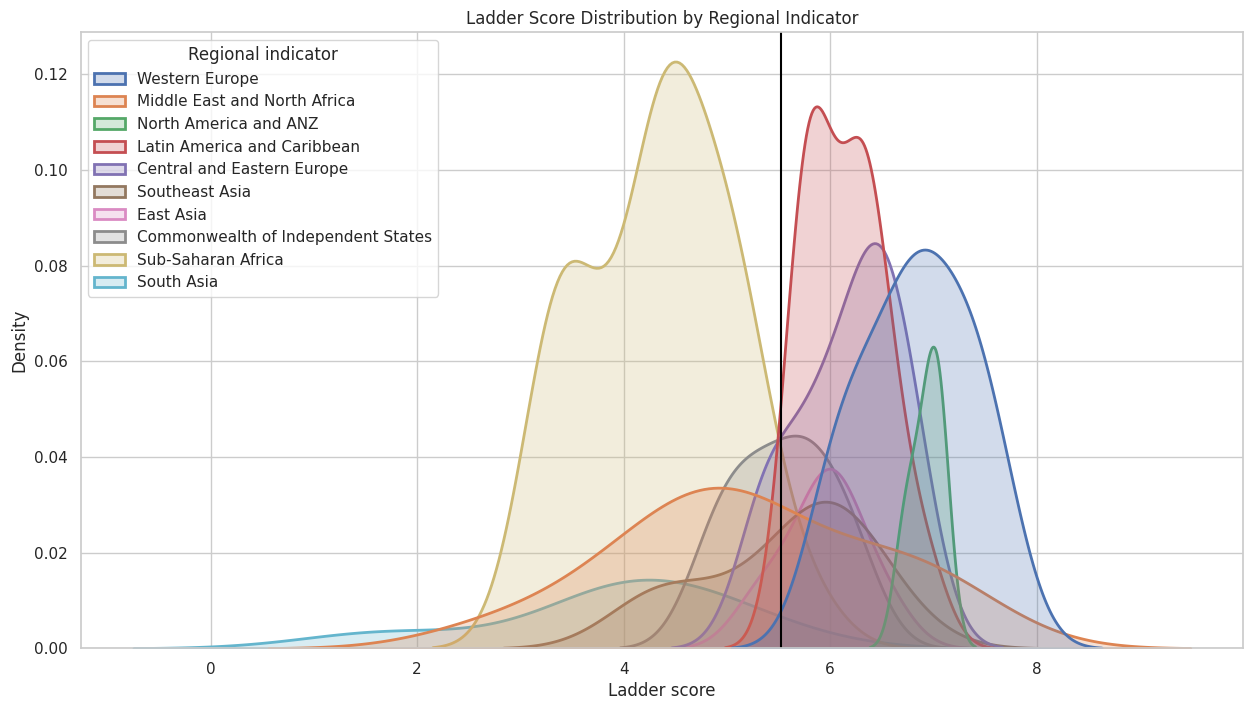

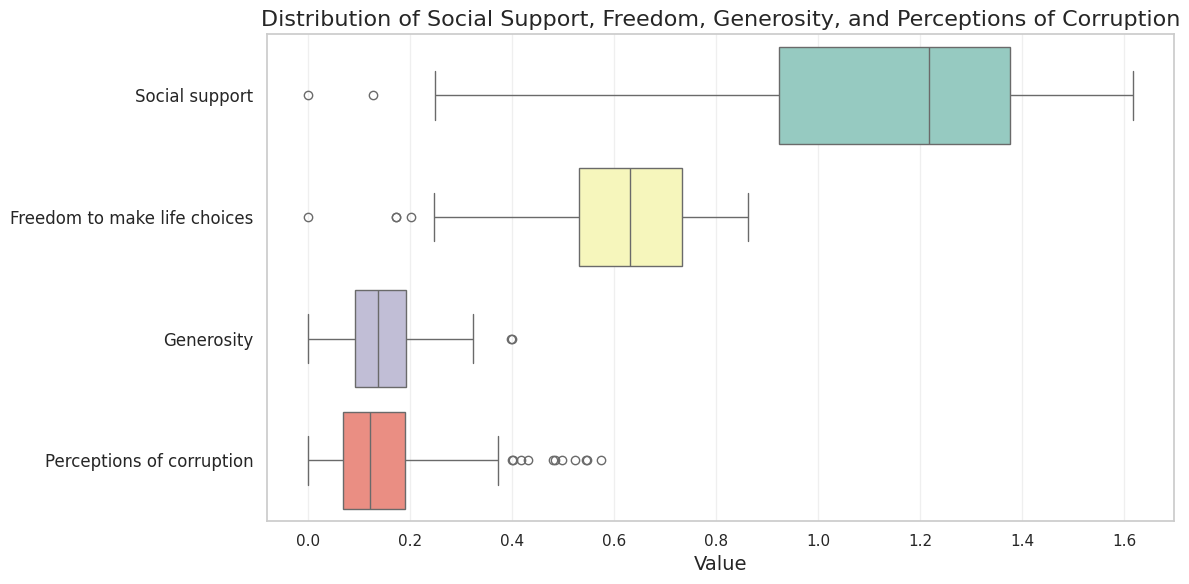

/tmp/ipykernel_140183/800604504.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




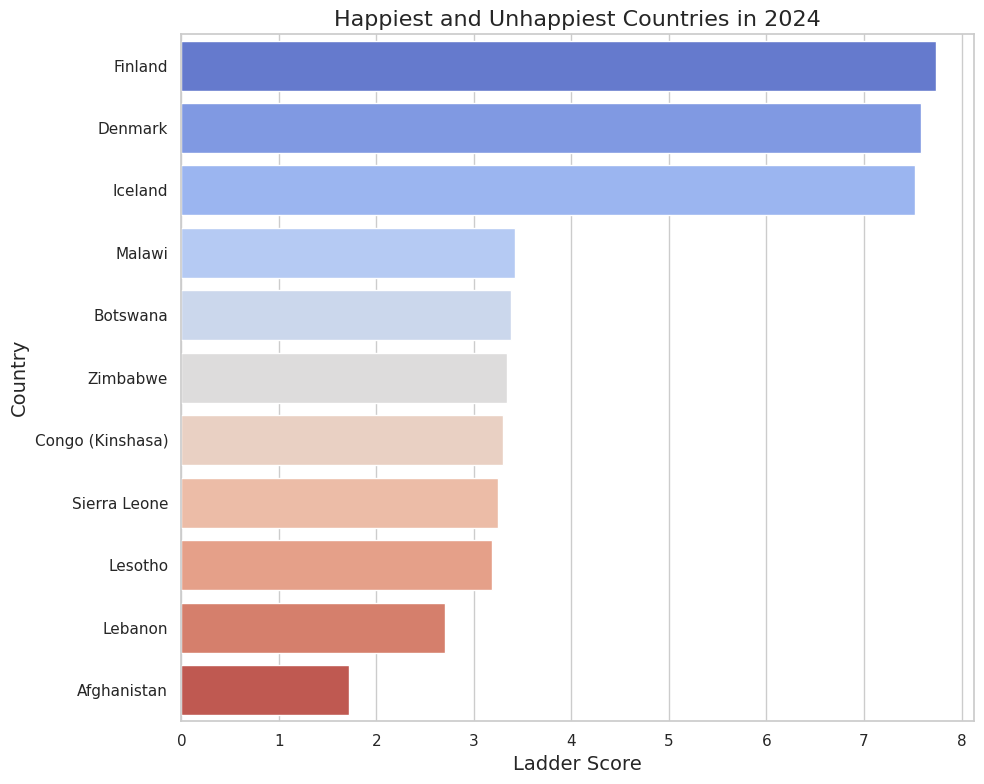

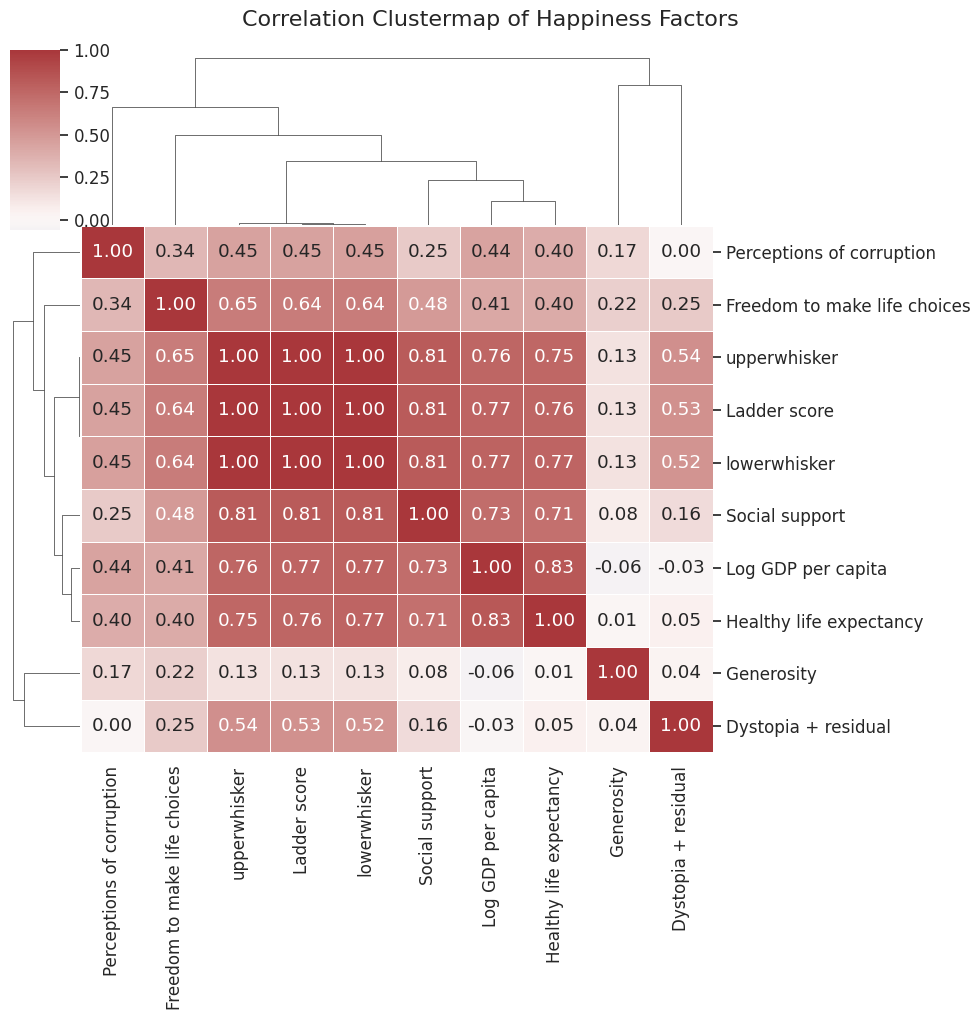

In [128]:
# Main function to execute the analysis
# This cell defines the main function to load the dataset, compute summary statistics,
# and generate all the visualizations.

def main():
    # Filepath to your CSV file
    filepath = 'World-happiness-report-2024.csv'
    
    # Load and clean data
    df = load_and_clean_data(filepath)
    
    # Variables for summary statistics
    variables = [
        'Ladder score',
        'Log GDP per capita',
        'Social support',
        'Healthy life expectancy',
        'Freedom to make life choices',
        'Generosity',
        'Perceptions of corruption'
    ]
    
    # Compute summary statistics
    summary_stats = compute_summary_stats(df, variables)
    
    # Set Variable as index for better display
    summary_stats.set_index('Variable', inplace=True)
    
    print("Summary Statistics for Key Variables:\n")
    print(summary_stats)
    
    # Generate plots
    plot_ladder_score_distribution(df)
    plot_boxplot_social_factors(df)
    plot_happiest_unhappiest_countries(df)
    plot_correlation_clustermap(df)

# Run the main function
if __name__ == '__main__':
    main()